# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
sample = cities[0]

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key + "&q="
url = base_url + sample
print(f"city: {sample} \nlink: {url}\n")

from pprint import pprint 

sample_data = (requests.get(url)).json()
pprint(sample_data)

city: albany 
link: http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=albany

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1561503152,
 'id': 5106834,
 'main': {'humidity': 88,
          'pressure': 1009,
          'temp': 77.18,
          'temp_max': 84.2,
          'temp_min': 70},
 'name': 'Albany',
 'rain': {'1h': 5.46},
 'sys': {'country': 'US',
         'id': 3273,
         'message': 0.0108,
         'sunrise': 1561454292,
         'sunset': 1561509410,
         'type': 1},
 'timezone': -14400,
 'visibility': 8047,
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10d',
              'id': 502,
              'main': 'Rain'}],
 'wind': {'deg': 140, 'speed': 4.7}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Lists
city_list=[]
country = []
lat = []
lng = []
temp = [] 
wind = []
cloudiness = []
humidity = []
date = []

# Counters
count = 1 
sets  = 1


print('Beginning Data Retrieval')
print('---------------------------')
for city in cities:
    try:
        response = requests.get(f"{base_url}{city}").json()
        print(f"Processing Record {count} of Set {sets} | {city}")        
        city_list.append(response['name'])
        country.append(response["sys"]["country"])         
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"]) 
        temp.append(response["main"]["temp_max"])  
        wind.append(response["wind"]["speed"])        
        cloudiness.append(response["clouds"]["all"]) 
        humidity.append(response["main"]["humidity"])       
        date.append(response["dt"])
        print(f"{base_url}{city}")
        count = count+1
    except: 
        print("City not found. Skipping...")

    if count == 51:
        count = 0 
        sets = sets+1

print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=albany
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=punta arenas
Processing Record 3 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=atuona
Processing Record 4 of Set 1 | erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=erenhot
Processing Record 5 of Set 1 | mbini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=mbini
Processing Record 6 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=jamestown
Processing Record 7 of Set 1 | mataura
ht

Processing Record 1 of Set 2 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=hovd
Processing Record 2 of Set 2 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=mount isa
Processing Record 3 of Set 2 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=guerrero negro
Processing Record 4 of Set 2 | khomutovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=khomutovka
Processing Record 5 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=kapaa
Processing Record 6 of Set 2 | laizhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=laizhou
Processing Record 7 of Set 2 | cherskiy
http://api.openweathermap.org/data/2.5/weather

Processing Record 2 of Set 3 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=nelson bay
Processing Record 3 of Set 3 | tubruq
City not found. Skipping...
Processing Record 3 of Set 3 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=berlevag
Processing Record 4 of Set 3 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=georgetown
Processing Record 5 of Set 3 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=saint-philippe
Processing Record 6 of Set 3 | kondinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=kondinskoye
Processing Record 7 of Set 3 | uwayl
City not found. Skipping...
Processing Record 7 of Set 3 | te anau
http://api.openweathermap.org/data/2.5/weath

Processing Record 4 of Set 4 | maykain
City not found. Skipping...
Processing Record 4 of Set 4 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=aksarka
Processing Record 5 of Set 4 | meadow lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=meadow lake
Processing Record 6 of Set 4 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=victoria
Processing Record 7 of Set 4 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=roald
Processing Record 8 of Set 4 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=dunedin
Processing Record 9 of Set 4 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=monrovia
Processing Record 10 of S

Processing Record 4 of Set 5 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=yar-sale
Processing Record 5 of Set 5 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=nishihara
Processing Record 6 of Set 5 | meylan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=meylan
Processing Record 7 of Set 5 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=ostrovnoy
Processing Record 8 of Set 5 | bad bevensen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=bad bevensen
Processing Record 9 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=huarmey
Processing Reco

Processing Record 4 of Set 6 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=palmer
Processing Record 5 of Set 6 | puerto madero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=puerto madero
Processing Record 6 of Set 6 | san javier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=san javier
Processing Record 7 of Set 6 | mullingar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=mullingar
Processing Record 8 of Set 6 | mmabatho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=mmabatho
Processing Record 9 of Set 6 | ati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=ati
Processing Record 10 of Set 6 | dikson
http://api.openweathermap.org/data/2.5/weather?

Processing Record 5 of Set 7 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=ixtapa
Processing Record 6 of Set 7 | alto araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=alto araguaia
Processing Record 7 of Set 7 | knysna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=knysna
Processing Record 8 of Set 7 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=tilichiki
Processing Record 9 of Set 7 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=arman
Processing Record 10 of Set 7 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=skibbereen
Processing Record 11 of Set 7 | san cristobal
http://api.openweathermap.org/data/2.5/

Processing Record 7 of Set 8 | altea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=altea
Processing Record 8 of Set 8 | bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=bintulu
Processing Record 9 of Set 8 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=ust-nera
Processing Record 10 of Set 8 | onitsha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=onitsha
Processing Record 11 of Set 8 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=okhotsk
Processing Record 12 of Set 8 | trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=trairi
Processing Record 13 of Set 8 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 10 of Set 9 | arrifes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=arrifes
Processing Record 11 of Set 9 | ijaki
City not found. Skipping...
Processing Record 11 of Set 9 | shagamu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=shagamu
Processing Record 12 of Set 9 | valle de allende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=valle de allende
Processing Record 13 of Set 9 | yenangyaung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=yenangyaung
Processing Record 14 of Set 9 | anahuac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=anahuac
Processing Record 15 of Set 9 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=moron
Proces

Processing Record 11 of Set 10 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=umm lajj
Processing Record 12 of Set 10 | salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=salamiyah
Processing Record 13 of Set 10 | port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=port keats
Processing Record 14 of Set 10 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=rongcheng
Processing Record 15 of Set 10 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=altay
Processing Record 16 of Set 10 | soledade
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=soledade
Processing Record 17 of Set 10 | tchollire
http://api.openweathermap.org/d

Processing Record 12 of Set 11 | saleaula
City not found. Skipping...
Processing Record 12 of Set 11 | yetkul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=yetkul
Processing Record 13 of Set 11 | parakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=parakou
Processing Record 14 of Set 11 | bording
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=bording
Processing Record 15 of Set 11 | ruy barbosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=ruy barbosa
Processing Record 16 of Set 11 | exeter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=exeter
Processing Record 17 of Set 11 | zunyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=102aad55c7a6f4f96c25b446e65b1170&q=zunyi
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather = {"City" : city_list,
           "Country" : country,           
            "Lat" : lat, 
            "Lng" : lng,           
            "Max Temp" : temp,   
            "Wind Speed" : wind,           
            "Cloudiness" : cloudiness, 
            "Humidity" : humidity,
            "Date" : date}

weather_df = pd.DataFrame(weather)
weather_df.to_csv(output_data_file)

print(weather_df.count())
weather_df.head()

City          546
Country       546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
Cloudiness    546
Humidity      546
Date          546
dtype: int64


,City,Country,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity,Date
0,Albany,US,42.65,-73.75,84.20,9.62,75,69,1561503928
1,Punta Arenas,CL,-53.16,-70.91,30.00,10.00,92,92,1561504021
2,Atuona,PF,-9.80,-139.03,81.43,17.74,0,75,1561503751
3,Erenhot,CN,43.65,111.97,75.85,6.93,0,43,1561504022
4,Mbini,GQ,1.58,9.62,77.00,4.70,40,94,1561504022


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

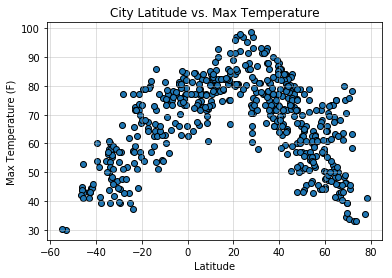

In [24]:
x_axis = weather_df["Lat"]

plt.scatter(x_axis, weather_df["Max Temp"], marker = "o", edgecolor = 'k')
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

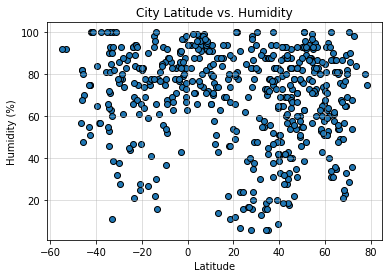

In [25]:
plt.scatter(x_axis, weather_df["Humidity"], marker = "o", edgecolor = 'k')
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

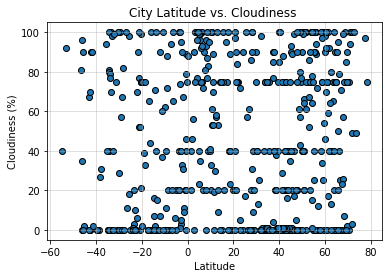

In [26]:
plt.scatter(x_axis, weather_df["Cloudiness"], marker = "o", edgecolor = 'k')
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_Cloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

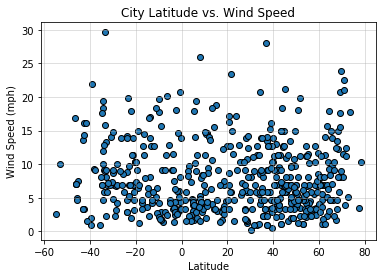

In [27]:
plt.scatter(x_axis, weather_df["Wind Speed"], marker = "o",edgecolor = 'k')
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(alpha = 0.5)

plt.savefig("output_data/Lat_wind.png")

plt.show()